Считывание и нормализация данных из файла

In [1]:
import pandas as pd

data = pd.read_csv("data.csv", sep=',', dtype={"km": float, "price": float})
m = len(data.index)

minKm = min(data["km"])
maxMinDiffKm = max(data["km"]) - minKm
minPrice = min(data["price"])
maxMinDiffPrice = max(data["price"]) - minPrice

for i, row in data.iterrows():
    row["km"] = (row["km"] - minKm) / maxMinDiffKm
    row["price"] = (row["price"] - minPrice) / maxMinDiffPrice

Объявляем Тета0 и Тета1

In [2]:
theta0, theta1, mse = 0.0, 0.0, 0.0
learningRate = 0.05

Вычисляем theta0 и theta1

In [3]:
from sklearn.metrics import mean_squared_error

for epoch in range(1000):
    for i,row in data.iterrows():
        arr = [theta0 + theta1 * row["km"] - row["price"] for _, row in data.iterrows()]
        theta0 -= learningRate * sum(arr) / m
        theta1 -= learningRate * sum(arr * data["km"]) / m

    # estPrice = [(theta0 + theta1 * km) for km in data["km"]]
    estPrice = theta0 + theta1 * data["km"]
    prevMse = mse
    mse = mean_squared_error(data["price"], estPrice)
    if abs(mse - prevMse) < 0.0000001:
        break

print(f"Theta0: {round(theta0, 6)}")
print(f"Theta1: {round(theta1, 6)}")
print(f"Numbers of epochs: {epoch + 1}")

Theta0: 0.937936
Theta1: -0.999924
Numbers of epochs: 97


Вычисляем стоимость для заданного пробега

In [4]:
mileage = int(input("Введите пробег: "))

def predictPrice(km):
    normalizedMileage = (km - minKm) / maxMinDiffKm
    normalizedPrice = theta0 + theta1 * normalizedMileage
    price = normalizedPrice * maxMinDiffPrice + minPrice
    return price
price = predictPrice(mileage)
print(f"Predicted price: {round(price, 2)}")

Predicted price: 7636.56


График

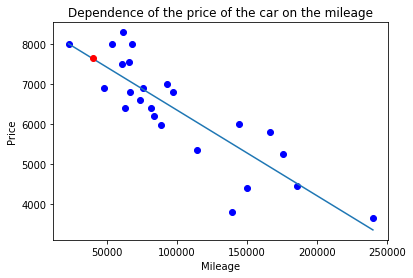

In [5]:
# %matpotlib inline
import matplotlib.pyplot as plt

newData = pd.read_csv("data.csv", sep=',', dtype={"km": float, "price": float})

fig, axe = plt.subplots()
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Dependence of the price of the car on the mileage")

axe.plot(newData["km"], newData["price"], color='b', marker='o', linewidth=0)

predictGraphX = [min(newData["km"]), max(newData["km"])]
predictGraphY = (predictPrice(predictGraphX[0]), predictPrice(predictGraphX[1]))
axe.plot(predictGraphX, predictGraphY)

axe.plot(mileage, price, 'or-')

plt.show()

Вычисление точности алгоритма

In [6]:
predict = [round(predictPrice(km), 2) for km in newData["km"]]
newData["predict price"] = predict
error = [round(abs(row["price"] - row["predict price"])) / 100 for _, row in newData.iterrows()]
newData["error, %"] = error
print(newData)
average_error = round(sum(newData["error, %"]) / len(newData.index), 2)
print(f"\nAverage error: {average_error}%")

          km   price  predict price  error, %
0   240000.0  3650.0        3362.37      2.88
1   139800.0  3800.0        5503.74     17.04
2   150500.0  4400.0        5275.07      8.75
3   185530.0  4450.0        4526.45      0.76
4   176000.0  5250.0        4730.11      5.20
5   114800.0  5350.0        6038.01      6.88
6   166800.0  5800.0        4926.72      8.73
7    89000.0  5990.0        6589.38      5.99
8   144500.0  5999.0        5403.30      5.96
9    84000.0  6200.0        6696.24      4.96
10   82029.0  6390.0        6738.36      3.48
11   63060.0  6390.0        7143.74      7.54
12   74000.0  6600.0        6909.95      3.10
13   97500.0  6800.0        6407.73      3.92
14   67000.0  6800.0        7059.54      2.60
15   76025.0  6900.0        6866.67      0.33
16   48235.0  6900.0        7460.57      5.61
17   93000.0  6990.0        6503.90      4.86
18   60949.0  7490.0        7188.86      3.01
19   65674.0  7555.0        7087.88      4.67
20   54000.0  7990.0        7337.3